<a href="https://colab.research.google.com/github/Dltmd202/StockAnalytics/blob/main/StockAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 9.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=85b813a02f8692cf3fa2d582e4560e10110179c13b36dce1ffe2730a65354eed
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip install pandas-datareader

In [ ]:
!pip install scipy

# 삼성전자와 마이크로소프트

* 삼성전자와 마이크로소프트 주가 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


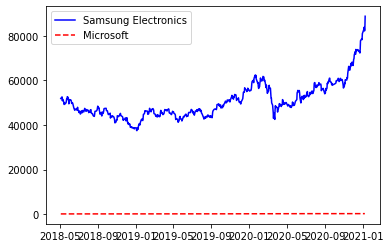

In [ ]:
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS',start='2018-05-04')
msft =pdr.get_data_yahoo('MSFT',start='2018-05-04')

plt.plot(sec.index,sec.Close,'b',label='Samsung Electronics')
plt.plot(msft.index,msft.Close,'r--',label='Microsoft')
plt.legend(loc='best')
plt.show()







* 삼성전자 종가

In [ ]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2021-01-04    83000.0
2021-01-05    83900.0
2021-01-06    82200.0
2021-01-07    82900.0
2021-01-08    88800.0
Name: Close, Length: 657, dtype: float64

* 삼성전자 일간 변동률

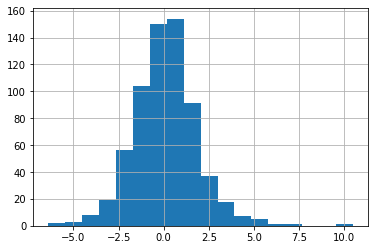

count    657.000000
mean       0.097480
std        1.777825
min       -6.387665
25%       -0.992063
50%        0.107181
75%        1.063830
max       10.470588
Name: Close, dtype: float64

In [ ]:
sec_daily_percent_change = (sec['Close']/sec['Close'].shift(1)-1) * 100
sec_daily_percent_change.iloc[0] = 0
plt.hist(sec_daily_percent_change,bins=18)
plt.grid(True)
plt.show()
sec_daily_percent_change.describe()

* 삼성전자 일간 변동률 누적합

In [ ]:
sec_daily_percent_changeSum = sec_daily_percent_change.cumsum()
sec_daily_percent_changeSum

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-01-04    57.017436
2021-01-05    58.101773
2021-01-06    56.075552
2021-01-07    56.927133
2021-01-08    64.044142
Name: Close, Length: 657, dtype: float64

* 마이크로소프트 종가

In [ ]:
msft['Close']

Date
2018-05-04     95.160004
2018-05-07     96.220001
2018-05-08     95.809998
2018-05-09     96.940002
2018-05-10     97.910004
                 ...    
2020-12-31    222.419998
2021-01-04    217.690002
2021-01-05    217.899994
2021-01-06    212.250000
2021-01-07    218.289993
Name: Close, Length: 675, dtype: float64

* 마이크로소프트 일간 변동률

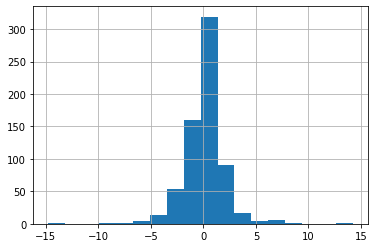

count    675.000000
mean       0.144021
std        2.046149
min      -14.739031
25%       -0.724519
50%        0.164399
75%        1.060254
max       14.216888
Name: Close, dtype: float64

In [ ]:
msft_daily_percent_change = (msft['Close']/msft['Close'].shift(1)-1) * 100
msft_daily_percent_change.iloc[0] = 0
plt.hist(msft_daily_percent_change,bins=18)
plt.grid(True)
plt.show()
msft_daily_percent_change.describe()

* 마이크로소프트 일간 변동률 누적합

In [ ]:
msft_daily_percent_changeSum = msft_daily_percent_change.cumsum()
msft_daily_percent_changeSum

Date
2018-05-04     0.000000
2018-05-07     1.113911
2018-05-08     0.687800
2018-05-09     1.867223
2018-05-10     2.867843
                ...    
2020-12-31    98.991635
2021-01-04    96.865029
2021-01-05    96.961493
2021-01-06    94.368563
2021-01-07    97.214261
Name: Close, Length: 675, dtype: float64

* 삼성전자 마이크로소프트 주식수익률 비교

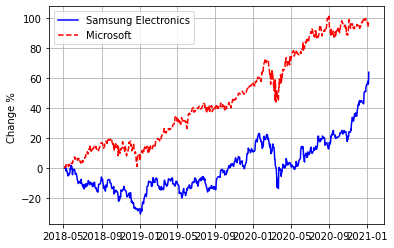

In [ ]:
plt.plot(sec.index , sec_daily_percent_changeSum,'b',label='Samsung Electronics')
plt.plot(msft.index,msft_daily_percent_changeSum,'r--',label='Microsoft')
plt.grid(True)
plt.ylabel('Change % ')
plt.legend(loc='best')
plt.show()

# KOSPI

* KOSPI MDD

[*********************100%***********************]  1 of 1 completed


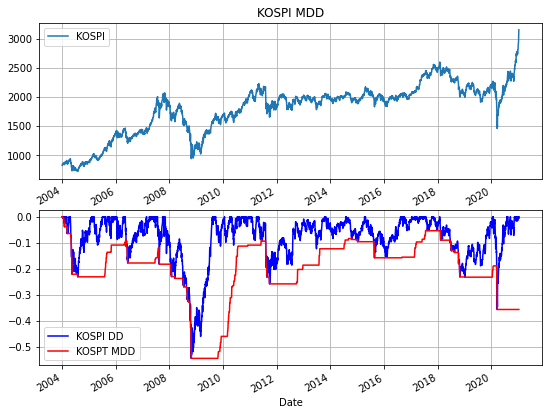

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()

kospi = pdr.get_data_yahoo('^KS11','2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window,min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0 
max_dd = drawdown.rolling(window , min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI',title='KOSPI MDD',grid = True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue',label='KOSPI DD',grid=True,legend=True)
max_dd.plot(c='red' , label='KOSPT MDD' , grid =True , legend = True)
plt.show()

## DOW Jones

단순 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


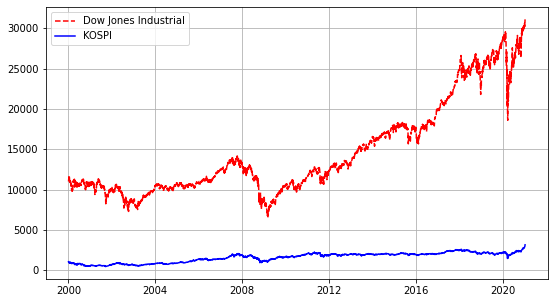

In [ ]:
import matplotlib.pyplot as plt
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')


plt.figure(figsize=(9,5))
plt.plot(dow.index , dow.Close , 'r--',label='Dow Jones Industrial')
plt.plot(kospi.index , kospi.Close , 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

지수화 비교

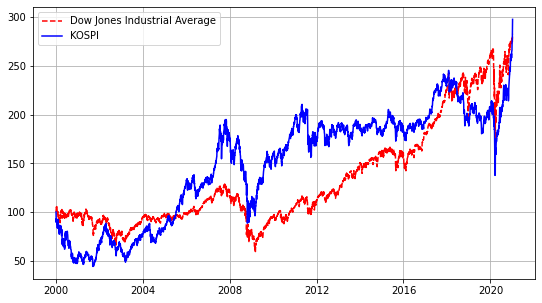

In [ ]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.plot(d.index , d , 'r--' , label='Dow Jones Industrial Average')
plt.plot(k.index , k , 'b' , label = 'KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

산점도 분석

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

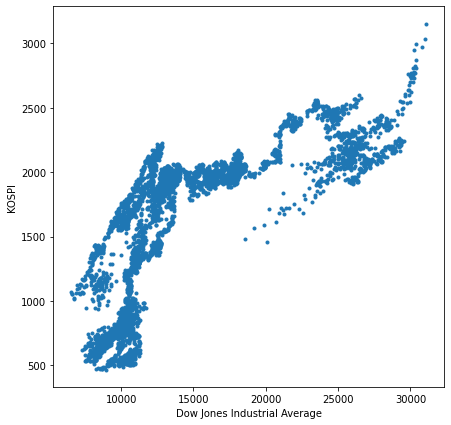

In [ ]:
import pandas as pd

dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

df = pd.DataFrame({'DOW':dow['Close'] , 'KOSPI':kospi['Close']})
df.fillna(method='bfill')
df.fillna(method='ffill')



선형회귀 모델 적용

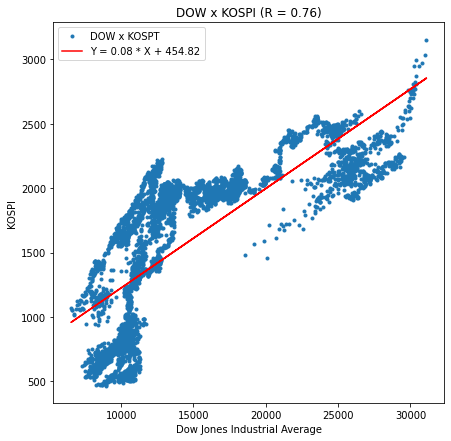

In [ ]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

yf.pdr_override()
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')


df = pd.DataFrame({'DOW':dow['Close'],'KOSPI':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df['DOW'],df['KOSPI'])
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df['DOW'],df['KOSPI'],'.')
plt.plot(df['DOW'], regr.slope * df['DOW'] + regr.intercept,'r')
plt.legend(['DOW x KOSPT',regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()



## TLT

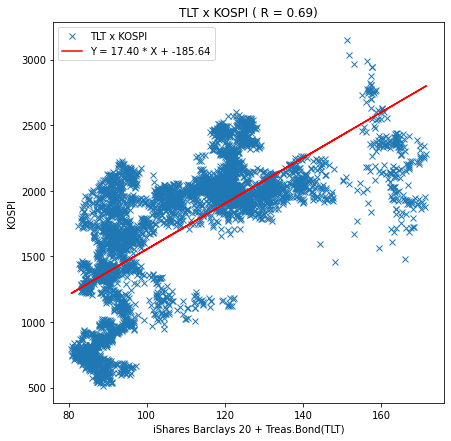

In [ ]:
from scipy import stats
import yfinance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd

yf.pdr_override()

kospi = pdr.get_data_yahoo('^KS11','2002-07-30')
tlt = pdr.get_data_yahoo('TLT','2002-07-30')

data = pd.DataFrame({'TLT':tlt['Close'],'KOSPI':kospi['Close']})
data = data.fillna(method='bfill')
data =data.fillna(method='ffill')

regr = stats.linregress(data['TLT'],data['KOSPI'])
regr_line =f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(data['TLT'],data['KOSPI'],'x')
plt.plot(data['TLT'] , regr.slope * data['TLT'] + regr.intercept,'r-')
plt.legend(['TLT x KOSPI',regr_line])
plt.xlabel("iShares Barclays 20 + Treas.Bond(TLT)")
plt.ylabel("KOSPI")
plt.title(f"TLT x KOSPI ( R = {regr.rvalue:.2f})")
plt.show()
